In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
# Acquire, load, and preview the data.
data = pd.read_csv('Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [ 2.93888937]

R-squared:
0.897210638179


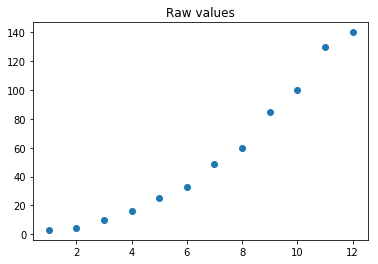

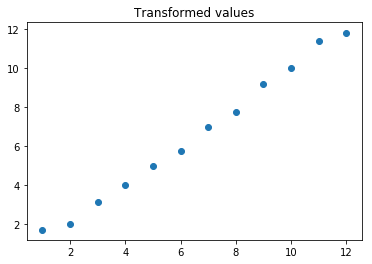

In [3]:
# Sample data.
outcome = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
feature = [3, 4, 10, 16, 25, 33, 49, 60, 85, 100, 130, 140]

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in  feature]


# Well now isn't that nice.
plt.scatter(outcome, sqrt_feature)
plt.title('Transformed values')
plt.show()

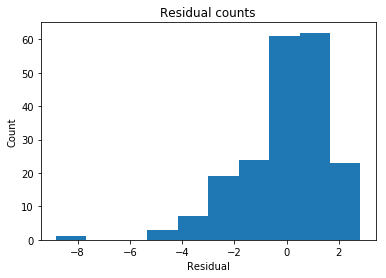

In [4]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

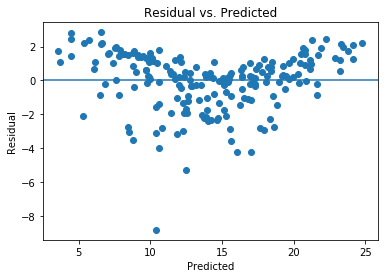

In [5]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

In [6]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


## Fixing Assumptions

### Square Root

In [7]:
data = pd.read_csv('Advertising.csv')
display(data.head())

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


In [8]:
data['tv_sqrt'] = np.sqrt(data['TV'])
data['radio_sqrt'] = np.sqrt(data['Radio'])
data['newspaper_sqrt'] = np.sqrt(data['Newspaper'])
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,tv_sqrt,radio_sqrt,newspaper_sqrt
0,1,230.100,37.800,69.200,22.100,15.169,6.148,8.319
1,2,44.500,39.300,45.100,10.400,6.671,6.269,6.716
2,3,17.200,45.900,69.300,9.300,4.147,6.775,8.325
3,4,151.500,41.300,58.500,18.500,12.309,6.427,7.649
4,5,180.800,10.800,58.400,12.900,13.446,3.286,7.642


In [9]:
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['tv_sqrt','radio_sqrt','newspaper_sqrt']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.96780469  1.55683139  0.04403645]]

Intercept: 
 [-4.22436341]

R-squared:
0.908373083012


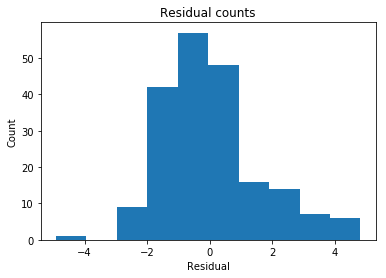

In [10]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

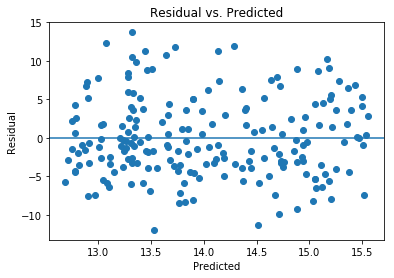

In [33]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

### Squared

In [12]:
data['tv_sqr'] = (data['TV']) * (data['TV'])
data['radio_sqr'] = (data['Radio']) * (data['Radio'])
data['newspaper_sqr'] = (data['Newspaper']) * (data['Newspaper'])
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,tv_sqrt,radio_sqrt,newspaper_sqrt,tv_sqr,radio_sqr,newspaper_sqr
0,1,230.100,37.800,69.200,22.100,15.169,6.148,8.319,52946.010,1428.840,4788.640
1,2,44.500,39.300,45.100,10.400,6.671,6.269,6.716,1980.250,1544.490,2034.010
2,3,17.200,45.900,69.300,9.300,4.147,6.775,8.325,295.840,2106.810,4802.490
3,4,151.500,41.300,58.500,18.500,12.309,6.427,7.649,22952.250,1705.690,3422.250
4,5,180.800,10.800,58.400,12.900,13.446,3.286,7.642,32688.640,116.640,3410.560


In [13]:
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['tv_sqr','radio_sqr','newspaper_sqr']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.42707531e-04   3.68654872e-03  -8.28260101e-05]]

Intercept: 
 [ 7.2029644]

R-squared:
0.799973684425


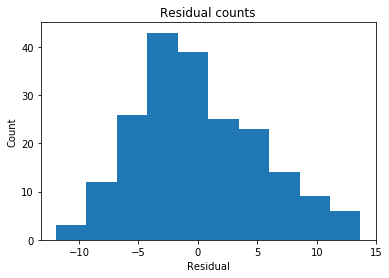

In [27]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

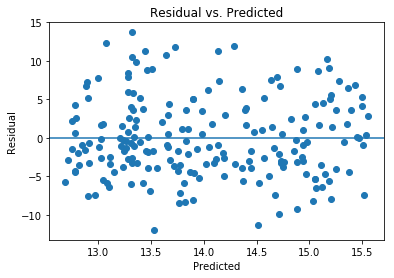

In [32]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

### Log

In [16]:
data['tv_log'] = np.log(data['TV'])
data['radio_log'] = np.log(data['Radio'])
data['newspaper_log'] = np.log(data['Newspaper'])
data.head()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


,Unnamed: 0,TV,Radio,Newspaper,Sales,tv_sqrt,radio_sqrt,newspaper_sqrt,tv_sqr,radio_sqr,newspaper_sqr,tv_log,radio_log,newspaper_log
0,1,230.100,37.800,69.200,22.100,15.169,6.148,8.319,52946.010,1428.840,4788.640,5.439,3.632,4.237
1,2,44.500,39.300,45.100,10.400,6.671,6.269,6.716,1980.250,1544.490,2034.010,3.795,3.671,3.809
2,3,17.200,45.900,69.300,9.300,4.147,6.775,8.325,295.840,2106.810,4802.490,2.845,3.826,4.238
3,4,151.500,41.300,58.500,18.500,12.309,6.427,7.649,22952.250,1705.690,3422.250,5.021,3.721,4.069
4,5,180.800,10.800,58.400,12.900,13.446,3.286,7.642,32688.640,116.640,3410.560,5.197,2.380,4.067


In [17]:
data['radio_log'] = data['radio_log'].fillna(data['radio_log'].mean())
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,tv_sqrt,radio_sqrt,newspaper_sqrt,tv_sqr,radio_sqr,newspaper_sqr,tv_log,radio_log,newspaper_log
0,1,230.100,37.800,69.200,22.100,15.169,6.148,8.319,52946.010,1428.840,4788.640,5.439,3.632,4.237
1,2,44.500,39.300,45.100,10.400,6.671,6.269,6.716,1980.250,1544.490,2034.010,3.795,3.671,3.809
2,3,17.200,45.900,69.300,9.300,4.147,6.775,8.325,295.840,2106.810,4802.490,2.845,3.826,4.238
3,4,151.500,41.300,58.500,18.500,12.309,6.427,7.649,22952.250,1705.690,3422.250,5.021,3.721,4.069
4,5,180.800,10.800,58.400,12.900,13.446,3.286,7.642,32688.640,116.640,3410.560,5.197,2.380,4.067


In [18]:
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['tv_log','radio_log','newspaper_log']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Sine

In [19]:
data['tv_sin'] = np.sin(data['TV'])
data['radio_sin'] = np.sin(data['Radio'])
data['newspaper_sin'] = np.sin(data['Newspaper'])

data['tv_cos'] = np.cos(data['TV'])
data['radio_cos'] = np.cos(data['Radio'])
data['newspaper_cos'] = np.cos(data['Newspaper'])
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,tv_sqrt,radio_sqrt,newspaper_sqrt,tv_sqr,radio_sqr,newspaper_sqr,tv_log,radio_log,newspaper_log,tv_sin,radio_sin,newspaper_sin,tv_cos,radio_cos,newspaper_cos
0,1,230.100,37.800,69.200,22.100,15.169,6.148,8.319,52946.010,1428.840,4788.640,5.439,3.632,4.237,-0.692,0.101,0.085,-0.722,0.995,0.996
1,2,44.500,39.300,45.100,10.400,6.671,6.269,6.716,1980.250,1544.490,2034.010,3.795,3.671,3.809,0.495,1.000,0.899,0.869,-0.030,0.438
2,3,17.200,45.900,69.300,9.300,4.147,6.775,8.325,295.840,2106.810,4802.490,2.845,3.826,4.238,-0.997,0.940,0.184,-0.079,-0.340,0.983
3,4,151.500,41.300,58.500,18.500,12.309,6.427,7.649,22952.250,1705.690,3422.250,5.021,3.721,4.069,0.647,-0.443,0.928,0.763,-0.896,-0.371
4,5,180.800,10.800,58.400,12.900,13.446,3.286,7.642,32688.640,116.640,3410.560,5.197,2.380,4.067,-0.987,-0.981,0.961,0.158,-0.194,-0.277


In [20]:
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['tv_sin','radio_sin','newspaper_sin']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[-0.38740111 -1.33320927 -0.02493203]]

Intercept: 
 [ 14.02732016]

R-squared:
0.0419886434927


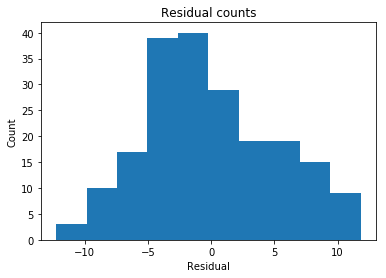

In [21]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

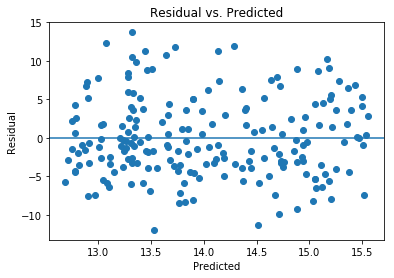

In [31]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

### Cosine

In [23]:
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['tv_cos','radio_cos','newspaper_cos']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[-1.11658193  0.01376946 -0.32788679]]

Intercept: 
 [ 14.14163159]

R-squared:
0.0254715616908


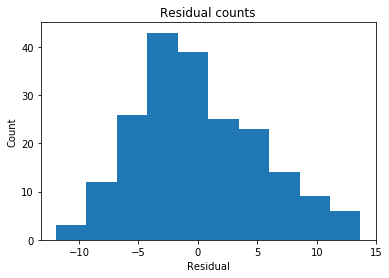

In [30]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

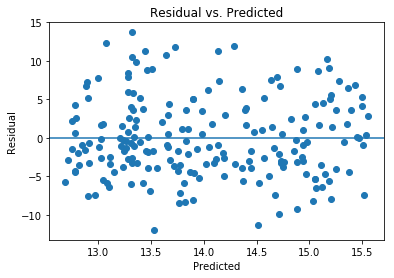

In [29]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Conclusion

For this set of sales data, using a sine transformation seems to result in the best residuals for both the homoscedasticity and multivariate normality plots. With the sine transformation, the homoscedasticity plot is very evenly distributed and the multivariate normality plot displays something close to a normal curve. Furthermore, the R-squared value is very low, meaning there is little correlation between the predicted and residual values. 